In [5]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt


In [10]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Close"]]


[*********************100%%**********************]  1 of 1 completed


In [11]:
stk_data

,Close
Date,
2021-07-01,746.450012
2021-07-02,750.650024
2021-07-05,760.349976
2021-07-06,758.349976
2021-07-07,762.900024
...,...
2022-01-19,729.599976
2022-01-20,728.900024
2022-01-21,712.500000


In [9]:
# Define rmsemape function
def rmsemape(y_Test, predicted_stock_price_test_ori):
    mse = mean_squared_error(y_Test, predicted_stock_price_test_ori)
    rmse = np.sqrt(mse)
    print("RMSE-Testset:", rmse)
    mape = np.mean(np.abs((y_Test - predicted_stock_price_test_ori) / y_Test)) * 100
    print("MAPE-Testset:", mape)


In [12]:
# Normalize data
Ms = MinMaxScaler()
data1 = Ms.fit_transform(stk_data)
data1 = pd.DataFrame(data1, columns=["Close"])

In [13]:
# Train-test split
training_size = round(len(data1) * 0.80)
train_data, test_data = data1[:training_size], data1[training_size:]


In [14]:
# Fit AR model
lag = 4  # You can adjust this based on your data
model = AutoReg(train_data['Close'], lags=lag)
model_fit = model.fit()


In [15]:
# Forecasting
forecast_steps = len(test_data)
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + forecast_steps - 1, dynamic=False)


In [17]:
# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=['Close'])
forecast_df

,Close
114,0.309645
115,0.307630
116,0.311793
117,0.319206
118,0.326103
119,0.331549
120,0.336020
121,0.340267
122,0.344589
123,0.348940


In [18]:
# Inverse transform the forecasted data
forecast_df_inv = Ms.inverse_transform(forecast_df)
test_data_inv = Ms.inverse_transform(test_data)


In [22]:
# Convert to DataFrame
forecast_df_inv = pd.DataFrame(forecast_df_inv, columns=["Close"])
test_data_inv = pd.DataFrame(test_data_inv, columns=["Close"])
test_data_inv

,Close
0,709.650024
1,688.900024
2,674.349976
3,665.849976
4,669.349976
5,678.799988
6,667.500000
7,672.150024
8,675.450012
9,670.500000


In [20]:
# Evaluation
print("Evaluating Close prices")
rmsemape(test_data_inv['Close'], forecast_df_inv['Close'])
print("************")


Evaluating Close prices
RMSE-Testset: 28.880108300071388
MAPE-Testset: 3.415374641218951
************


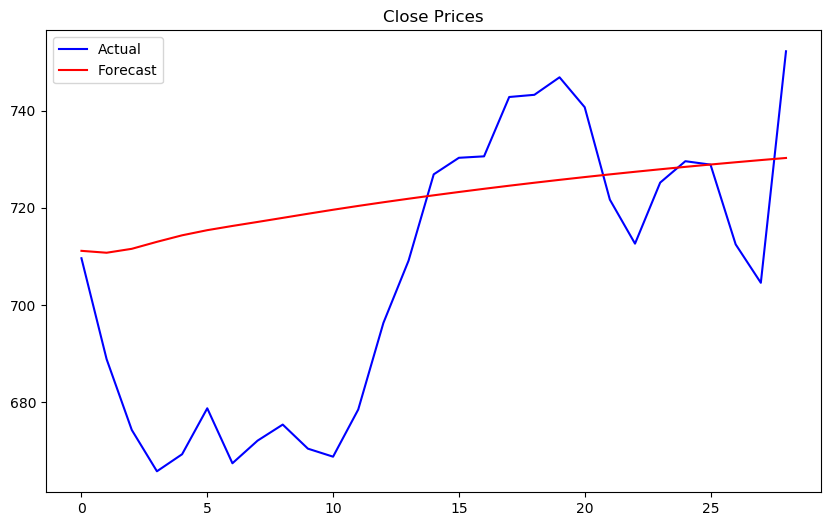

In [21]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(test_data_inv['Close'], label='Actual', color='blue')
plt.plot(forecast_df_inv['Close'], label='Forecast', color='red')
plt.title('Close Prices')
plt.legend()
plt.show()